# Photometric Redshifts of Galaxies

The uniformity of expansion of universe means that there is a relationship between the distance to a galaxy, and the speed that it appears to be receeding from us. This recession speed leads to a shift in the frequency of photons, very similar to the audio doppler shift that can be heard when a car blaring its horn passes by. If a galaxy were moving toward us, its light would be shifted to higher frequencies, or blue-shifted. Because the universe is expanding away from us, distant galaxies appear to be red-shifted: their photons are shifted to lower frequencies.

In cosmology, the redshift is measured with the parameter z, defined in terms of the observed wavelength \lambda_{obs} and the emitted wavelength lambda as p:

                                 p(observation) = (1 + z) * p

When a spectrum can be obtained, determining the redshift is rather straight-forward: if you can localize the spectral fingerprint of a common element, such as hydrogen, then the redshift can be computed using simple arithmetic. But similarly to the case of Star/Quasar classification, the task becomes much more difficult when only photometric observations are available.



Because of the spectrum shift, an identical source at different redshifts will have a different color through each pair of filters. See the following figure:

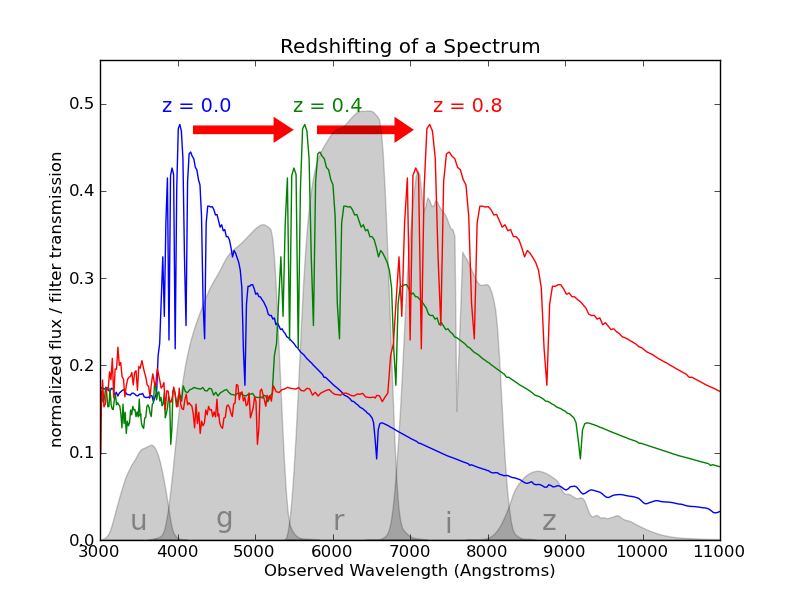

The spectrum of the star Vega (\alpha-Lyr) at three different redshifts. The SDSS ugriz filters are shown in gray for reference.

At redshift z=0.0, the spectrum is bright in the u and g filters, but dim in the i and z filters. At redshift z=0.8, the opposite is the case. This suggests the possibility of determining redshift from photometry alone. The situation is complicated by the fact that each individual source has unique spectral characteristics, but nevertheless, these photometric redshifts are often used in astronomical applications.

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = np.load('sdss_galaxy_colors.npy')
df = pd.DataFrame(df)

In [5]:
df

,u,g,r,i,z,spec_class,redshift,redshift_err
0,19.84132,19.52656,19.46946,19.17955,19.10763,b'QSO',0.539301,0.000065
1,19.86318,18.66298,17.84272,17.38978,17.14313,b'GALAXY',0.164570,0.000012
2,19.97362,18.31421,17.47922,17.07440,16.76174,b'GALAXY',0.041900,0.000022
3,19.05989,17.49459,16.59285,16.09412,15.70741,b'GALAXY',0.044277,0.000011
4,19.45567,18.33084,17.67185,17.30189,17.13650,b'GALAXY',0.041644,0.000018
...,...,...,...,...,...,...,...,...
49995,18.78195,17.36771,16.62808,16.24659,15.97817,b'GALAXY',0.078153,0.000031
49996,19.65251,17.59881,16.63644,16.19178,15.85334,b'GALAXY',0.079438,0.000020
49997,19.82667,18.10038,17.16133,16.57960,16.19755,b'GALAXY',0.078459,0.000022
49998,19.98672,19.75385,19.57130,19.27739,19.25895,b'QSO',1.567295,0.000451


In [8]:
df = df.drop(['spec_class','redshift_err'], axis = 1)

In [9]:
df

,u,g,r,i,z,redshift
0,19.84132,19.52656,19.46946,19.17955,19.10763,0.539301
1,19.86318,18.66298,17.84272,17.38978,17.14313,0.164570
2,19.97362,18.31421,17.47922,17.07440,16.76174,0.041900
3,19.05989,17.49459,16.59285,16.09412,15.70741,0.044277
4,19.45567,18.33084,17.67185,17.30189,17.13650,0.041644
...,...,...,...,...,...,...
49995,18.78195,17.36771,16.62808,16.24659,15.97817,0.078153
49996,19.65251,17.59881,16.63644,16.19178,15.85334,0.079438
49997,19.82667,18.10038,17.16133,16.57960,16.19755,0.078459
49998,19.98672,19.75385,19.57130,19.27739,19.25895,1.567295


In [11]:
df.isnull().sum()

u           0
g           0
r           0
i           0
z           0
redshift    0
dtype: int64

### Decision Tree Regressor

we use decision tree model to help predict the redshift of galaxies based on their measured colour indices. 

In [14]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('redshift',axis=1), df.redshift, train_size= 0.75, random_state=1)

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
dtr = DecisionTreeRegressor(max_depth = 3)

In [59]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [60]:
dtr.score(x_train, y_train)

0.6576532180822592

In [61]:
dtr.score(x_test, y_test)

0.6227092928653819

### Using Median of differences as our accuracry measure

In [74]:
def get_features_targets(data):
    features = np.zeros(shape = (len(data), 4))
    features[:, 0] = data['u'] - data['g']     #difference of u and g
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']
    targets = data['redshift']
  
    return features, targets


def median_diff(predicted, actual):
    return np.median(abs(predicted - actual))



# write a function that splits the data into training and testing subsets
# trains the model and returns the prediction accuracy with median_diff
def validate_model(model, features, targets):
    
    # split the data into training and testing features and predictions
    train_features,test_features,train_targets,test_targets = train_test_split(features,targets,test_size = 0.50)

    # train the model
    dtr = DecisionTreeRegressor()
    dtr.fit(train_features, train_targets)

    # get the predicted_redshifts
    predictions = dtr.predict(test_features)

    # use median_diff function to calculate the accuracy
    return median_diff(test_targets, predictions)


if __name__ == "__main__":
    data = np.load('sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # initialize model
    dtr = DecisionTreeRegressor()

    # validate the model and print the med_diff
    diff = validate_model(dtr, features, targets)
    print('Median difference: {:f}'.format(diff))


Median difference: 0.021718


The median of differences of ≈ 0.02. This means that half of our galaxies have a error in the prediction of 0.02 which is pretty good. One of the reason we chose the median of differences as our accuracy measure is that it gives a fair representation of the errors especially when the distribution of errors is skewed. 
 
 
 The graph below shows the distribution of residuals (differences) for our model along with the median and interquartile values.

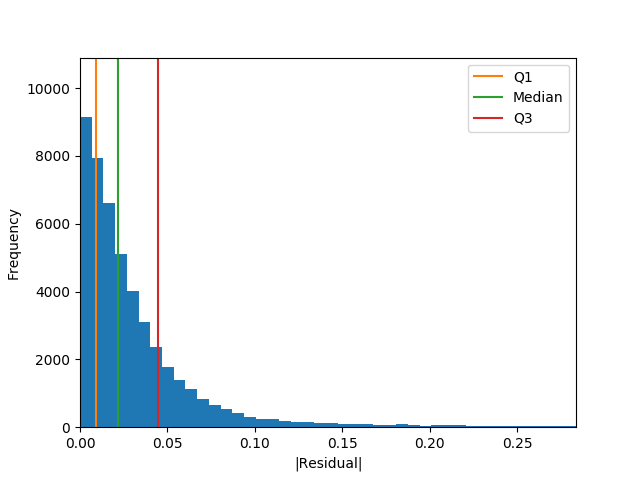

Your task here is simply to try and re-create the following plot.

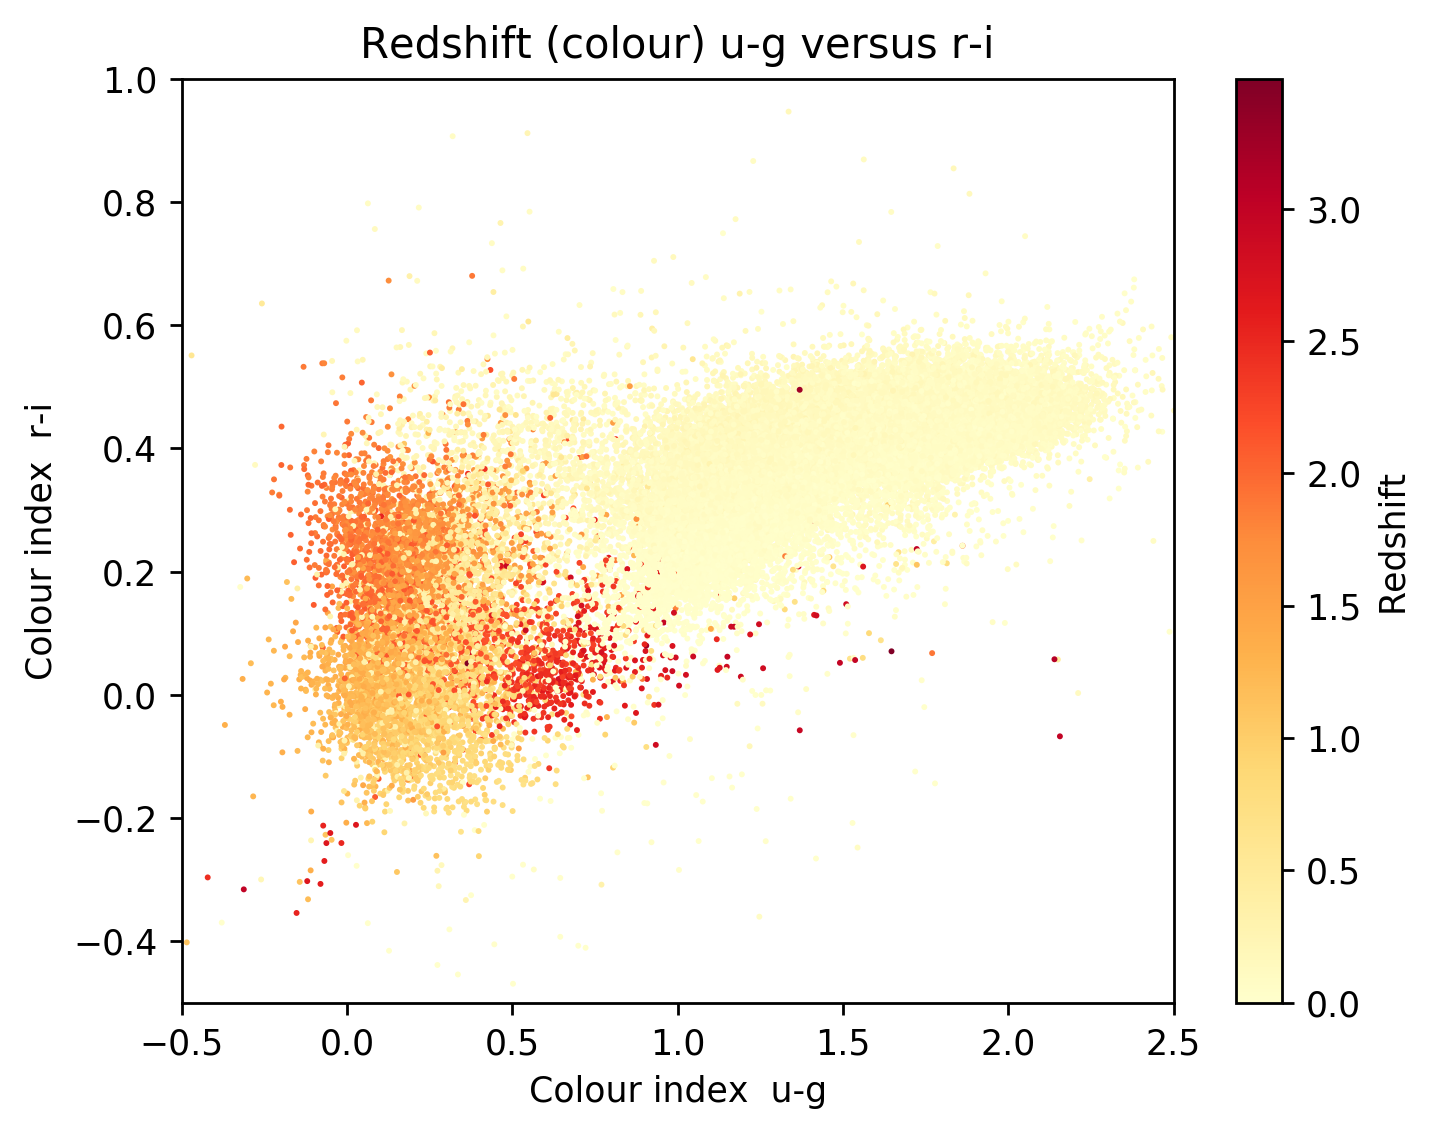

it shows that we get reasonably well defined regions where redshifts are similar. If we were to make a contour map of the redshifts in the colour index vs colour index space we would be able to get an estimate of the redshift for new data points based on a combination of their colour indices. This would lead to redshift estimates with significant uncertainties attached to them.

In [78]:
u_g = df.u - df.g  #diff bet u and g
r_i = df.r - df.i  #diff bet r and i

redshift = df.redshift

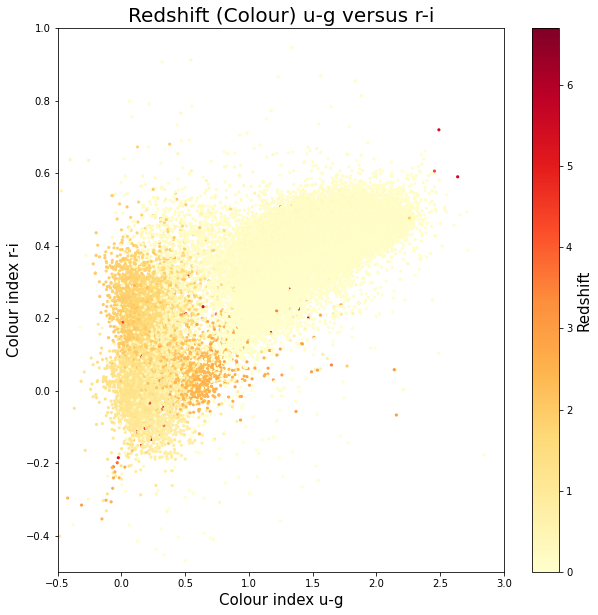

In [110]:
plt.figure(figsize = (10,10))

cmap = plt.get_cmap('YlOrRd')
plot = plt.scatter(x = u_g, y = r_i, c = redshift, cmap = cmap, s=10, lw = 0);

# s = thickness of points, lw = linewidth, cmap = supplied colormap, c sets the colour of points

#We use the returned plot to add a colorbar
cb = plt.colorbar(plot)
cb.set_label('Redshift', size = 15)


#setting the labels
plt.xlabel('Colour index u-g', size = 15)
plt.ylabel('Colour index r-i', size = 15)
plt.title('Redshift (Colour) u-g versus r-i', size = 20)

#limiting the axis values
plt.xlim(-0.5,3)
plt.ylim(-0.5,1);